# Compare_b2_values

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import coxeter

$\bullet$ $B_{2}$ virial coefficient can be computed by $1+3\alpha$, where $\alpha$ is defined as the asphericity of particle shape.

In [2]:
f = coxeter.families.Family323Plus()

def compute_b2(a, c):
    """
    Compute B2 virial coefficient of particle shape from asphericity.
    a, c: refer to `Soft Matter 14 8692-8697 (2018)`.
    """
    particle = f.get_shape(a, c)
    b2 = 1 + 3 * particle.asphericity
    return b2

$\bullet$ Calculate $B_2$ coefficients on $(a,c)$.

In [3]:
a_arr = np.linspace(1, 3, 30)
c_arr = np.linspace(1, 3, 30)
av, cv = np.meshgrid(a_arr, c_arr)

b2_arr = []
for ai in a_arr.flatten():
    for ci in c_arr.flatten():
        b2_arr.append(compute_b2(ai, ci))
        
b2_arr = np.array(b2_arr)

$\bullet$ Compare $B_2$ values along $c$ equals to constant versus $c$ equals to $0.2a+0.8$.

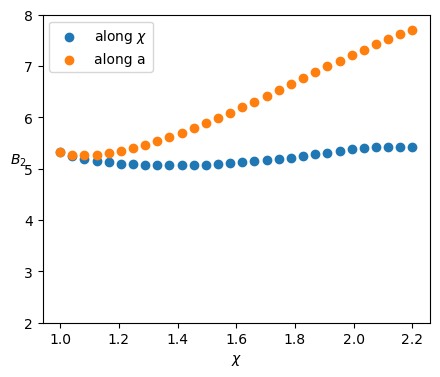

In [8]:
def compute_c2(a2):
    """
    Calculate c2's with respect to a linear relation c2=0.2*a2+0.8.
    """
    return 0.2 * a2 + 0.8

a2_arr = a_arr
c2_arr = compute_c2(a2_arr)
curve = np.vstack((a2_arr, c2_arr))

const_c = 1.0
asph_arr = [compute_b2(ai, ci) for ai, ci in curve.T]
ref_arr = [compute_b2(ai, const_c) for ai, _ in curve.T]

fig, ax = plt.subplots(figsize=(5,4), nrows=1, ncols=1)
ax.scatter(curve.mean(axis=0), asph_arr, label='along $\chi$')
ax.scatter(curve.mean(axis=0), ref_arr, label='along a')
ax.set_ylim(2,8)

ax.set_xlabel('$\chi$')
ax.set_ylabel('$B_2$').set_rotation(0)
ax.legend()

plt.show()

$\bullet$ Plot the linear relation on the $B_2$ contour.

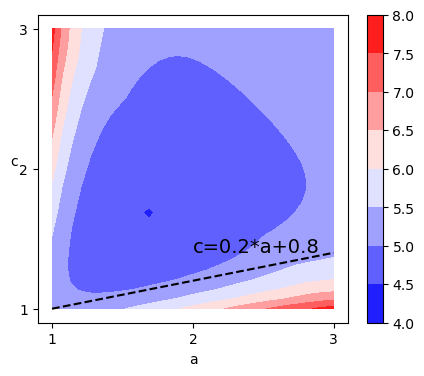

In [15]:
plt.rcParams['figure.figsize']=(5,4)
plt.contourf(a_arr, c_arr, b2_arr.reshape(30,30), cmap='bwr')
plt.plot(*curve, 'k--')
plt.annotate(text='c=0.2*a+0.8', 
             xy=(2.0,1.4), 
             fontsize=14)
plt.colorbar()

plt.xlim(0.9, 3.1)
plt.ylim(0.9, 3.1)

plt.xticks([1, 2, 3])
plt.yticks([1, 2, 3])

plt.xlabel('a')
plt.ylabel('c').set_rotation(0)

plt.show()

# Visualize particle shape with corresponding $B_2$ value

In [17]:
import numpy as np
import matplotlib.pyplot as plt

import fresnel
device = fresnel.Device()
scene = fresnel.Scene()

import rowan
import coxeter

In [18]:
def group323(alpha):
    family323 = coxeter.families.Family323Plus()
    particle = family323.get_shape(a=alpha, c=0.2*alpha+0.8)
    verts = particle.vertices/particle.volume**(1/3)
    return verts

In [19]:
alpha_arr = [1., 1.5, 2.0, 2.5, 3.0]
pos_arr = np.array([-2., -1., 0., 1., 2.])*2.
for alpha_i, pos_i in zip(alpha_arr, pos_arr):
    verts = group323(alpha_i)

    poly_info = fresnel.util.convex_polyhedron_from_vertices(verts)

    v = [1., 1.5, 0.]
    v/=np.linalg.norm(v)
    q = rowan.from_axis_angle(v, 0.8)
    geometry = fresnel.geometry.ConvexPolyhedron(scene, 
                                                 poly_info, 
                                                 position = [pos_i, 0., 0.],
                                                 orientation=[q],
                                                 outline_width = 0.005,
                                                 N=1)

    geometry.material = fresnel.material.Material(color=fresnel.color.linear([0.2,0.8,0.4]),
                                                  roughness=0.5)

In [20]:
# scene.camera = fresnel.camera.Orthographic.fit(scene, 
#                                                view='front', 
#                                                margin=0.8)

scene.camera = fresnel.camera.Orthographic(position=(0.0, 0.0, 1.0),
                                           look_at=(0.0, 0.0, 0.0),
                                           up=(0.0, 1.0, 0.0),
                                           height=4.0)

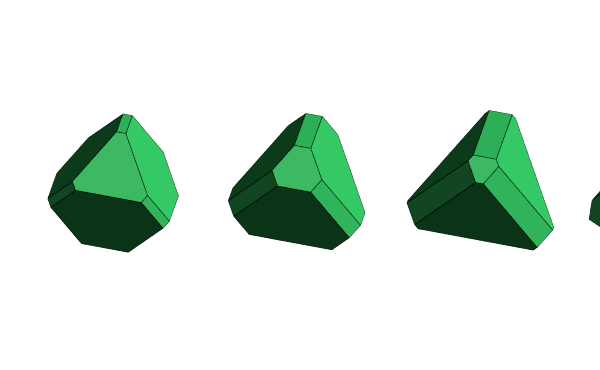

In [21]:
fresnel.preview(scene)

In [22]:
out = fresnel.pathtrace(scene, samples=64,
                        light_samples=32,
                        w=600, h=200)

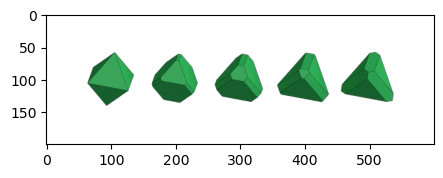

In [23]:
plt.imshow(out[:])